In [1]:

import os
from numpy import diag, zeros
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [25]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import lib.monotonic          as monotonic

In [3]:
def create_shells(num_shells):
    # For now, just equal radii for each shell.
    return (np.array(range(num_shells))+1)/float(num_shells)


def bresenham(x0, y0, x1, y1):
    """Yield integer coordinates on the line from (x0, y0) to (x1, y1).
    Input coordinates should be integers.
    The result will contain both the start and the end point.
    """
    dx = x1 - x0
    dy = y1 - y0

    xsign = 1 if dx > 0 else -1
    ysign = 1 if dy > 0 else -1

    dx = abs(dx)
    dy = abs(dy)

    if dx > dy:
        xx, xy, yx, yy = xsign, 0, 0, ysign
    else:
        dx, dy = dy, dx
        xx, xy, yx, yy = 0, ysign, xsign, 0

    D = 2*dy - dx
    y = 0

    for x in range(int(dx) + 1):
        yield int(x0 + x*xx + y*yx), int(y0 + x*xy + y*yy)
        if D >= 0:
            y += 1
            D -= 2*dx
        D += 2*dy


def coverage(shells, vals, grid_size=10):
    # Assume shells and vals are [0,1]
    retval = []
    for x0, y0, x1, y1 in zip(shells[:-1], vals[:-1], shells[1:], vals[1:]):
       
        retval = retval+list(bresenham(x0*grid_size, y0*grid_size, x1*grid_size,y1*grid_size))
    return set(retval)
    

In [4]:
def get_squares(shells, vals, grid_size = 10):
    cc= coverage(shells, vals, grid_size)
    data = np.zeros((grid_size, grid_size))
    for x,y in cc:
        try:
            data[grid_size-y-1][x] = 1.0
        except:
            pass
    return data

def plot_squares(shells, vals, grid_size = 10):
    data = get_squares(shells, vals, grid_size)
    fig, ax = plt.subplots()
    ax.imshow(data)
    
    plt.show()
    
def plot_grid(shells, vals, grid_size=10):
    data = get_squares(shells, vals, grid_size)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xy,z = zip(*list(np.ndenumerate(data)))
    x,y = zip(*xy)
    X = np.array(x).reshape(data.shape)
    Y = np.array(y).reshape(data.shape)
    Z = np.array(z).reshape(data.shape)    
#    ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.plot_wireframe(X,Y,Z, color='black')
    ax.set_title('surface');


In [149]:
def plot_spread(func, size, num=1000):
    data = np.zeros((size,size))
    for i in range(num):
        shells = create_shells(100)
        vals = func(shells)
        data = data + get_squares(shells, vals, size)

    data = np.flipud(data)

    top = cm.get_cmap('Oranges_r', 128)
    bottom = cm.get_cmap('Blues', 128)

    newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                           bottom(np.linspace(0, 1, 128))))
    newcmp = ListedColormap(np.flipud(newcolors), name='OrangeBlue')

    colormaps = [newcmp]
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3), constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(np.log10(data+1), cmap=cmap, rasterized=True, vmin=0, vmax=np.log10(data.max()+1))
        fig.colorbar(psm, ax=ax)
    plt.show()

In [147]:
def sorted_uniform(shells):
    num_shells = shells.size
    return sorted([random.uniform(0,1) for x in range(num_shells)], reverse=True)

def mass_moment(shells):
    from lib.mc_density import MCDensityFactory
    factory = MCDensityFactory()

def remaining_max(shells, power=5):
    num_shells = shells.size
    retval = []
    min_val = 0.0
    for i in range(num_shells):
        val =1.0
        for j in range(power):
            val = val*random.uniform(0, 1.0)
        min_val += val * (1.0-min_val)
        retval.append(min_val)
    retval.reverse()
    return retval

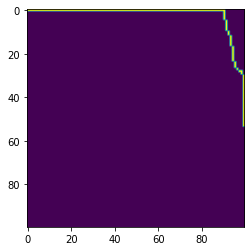

In [164]:
shells = create_shells(101)
vals = diagonal_method(shells)

plot_squares(shells, vals, 100)

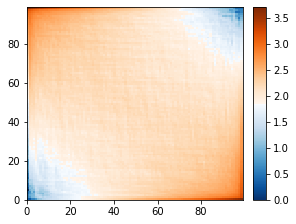

In [191]:
plot_spread(monotonic.get_monotonic_vals, 99, 10000)

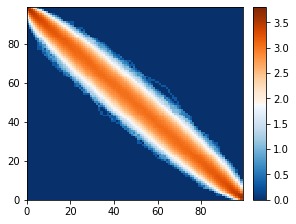

In [193]:
plot_spread(sorted_uniform, 99, 10000)

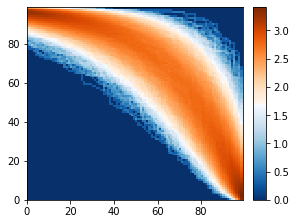

In [194]:
plot_spread(remaining_max, 99, 10000)

In [204]:
def diag_point(x_min, x_max, y_min, y_max):
    val = random.uniform(0,1)
    val2 = random.uniform(0,1)
    return (x_max-x_min)*val, (y_max-y_min)*val2
    #return (x_min + (x_max-x_min)*val, y_min+(y_max-y_min)*val)

def diag_seq(max_dist, x_min, x_max, y_min, y_max):
    x_mid, y_mid= diag_point(x_min, x_max, y_min, y_max)
    #if x_max-x_min < max_dist:
    return [(x_mid, y_mid)]
    #else:
    #    return diag_seq(max_dist, x_min, x_mid, y_mid, y_max) + \
    #                [(x_mid, y_mid)] + \
    #                diag_seq(max_dist, x_mid, x_max, y_min, y_mid)
    
def diagonal_method(shells):
    num_shells = shells.size
    vals = [(0,1)] + diag_seq(0.5/num_shells, 0,1,0,1) + [(1,0)]
    x,y = zip(*vals)
    return np.interp(shells,x,y)

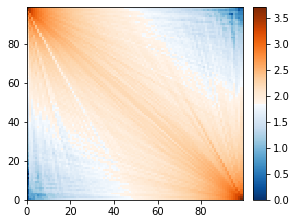

In [205]:
plot_spread(diagonal_method, 99, 10000)

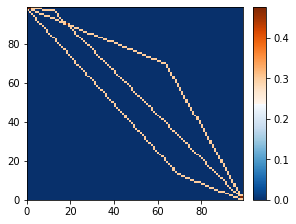

In [206]:
plot_spread(diagonal_method, 99, 3)

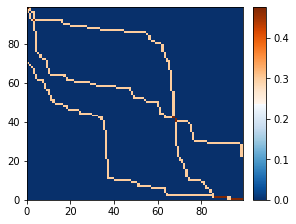

In [183]:
plot_spread(monotonic.get_monotonic_vals, 99, 3)